# Data Exploration & Preprocessing

Mục tiêu:
- Đọc dữ liệu World Bank đã tổng hợp (2000–2024)
- Khám phá, làm sạch, và chuẩn hóa dữ liệu
- Chia dữ liệu thành train/test để phục vụ các mô hình Machine Learning

Nguồn dữ liệu: `data/worldbank_2000_2024.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Đọc dữ liệu
df = pd.read_csv("../data/worldbank_2000_2024.csv")

# Xem kích thước & vài dòng đầu
print("Kích thước dữ liệu:", df.shape)
df.head()

Kích thước dữ liệu: (5425, 15)


,Country Name,Country Code,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Population living in slums (% of urban population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
0,Aruba,ABW,2000,90588.0,NaN,1.030817,72.939,20681.023027,7.622921,NaN,91.7,94.488806,2.965073,0.0,NaN
1,Aruba,ABW,2001,91439.0,NaN,0.935033,73.044,20740.132583,4.182002,NaN,100.0,94.770491,2.969193,NaN,NaN
2,Aruba,ABW,2002,92074.0,NaN,0.692052,73.135,21307.248251,-0.944953,NaN,100.0,95.052176,3.221322,0.0,NaN
3,Aruba,ABW,2003,93128.0,NaN,1.138229,73.236,21949.485996,1.110505,NaN,100.0,95.333861,3.671291,NaN,NaN
4,Aruba,ABW,2004,95138.0,NaN,2.135358,73.223,23700.631990,7.293728,NaN,100.0,95.615545,3.667304,0.0,NaN


## Thông tin tổng quan về dữ liệu
Kiểm tra kiểu dữ liệu, số lượng giá trị null, và thống kê mô tả cơ bản.


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 15 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Country Name                                                                                   5425 non-null   object 
 1   Country Code                                                                                   5425 non-null   object 
 2   Year                                                                                           5425 non-null   int64  
 3   Population, total                                                                              5425 non-null   float64
 4   Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)                            1834 non-null   float64
 5   Population growth (a

Country Name                                                                                        0
Country Code                                                                                        0
Year                                                                                                0
Population, total                                                                                   0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)                              3591
Population growth (annual %)                                                                        1
Life expectancy at birth, total (years)                                                           217
GDP per capita (current US$)                                                                      212
GDP growth (annual %)                                                                             284
People using safely managed sanitation services (% of population)                 

## Khám phá dữ liệu (Exploratory Data Analysis)
Một số biểu đồ minh họa phân phối và tương quan giữa các feature.

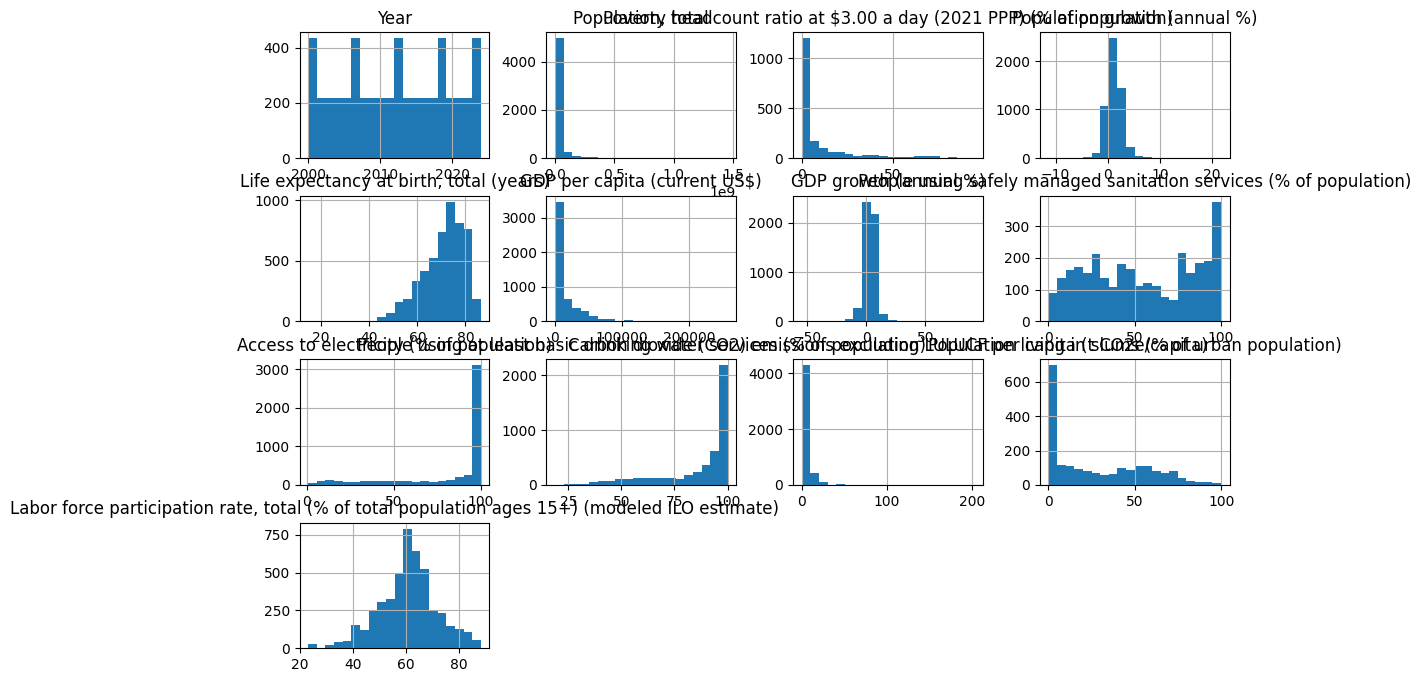

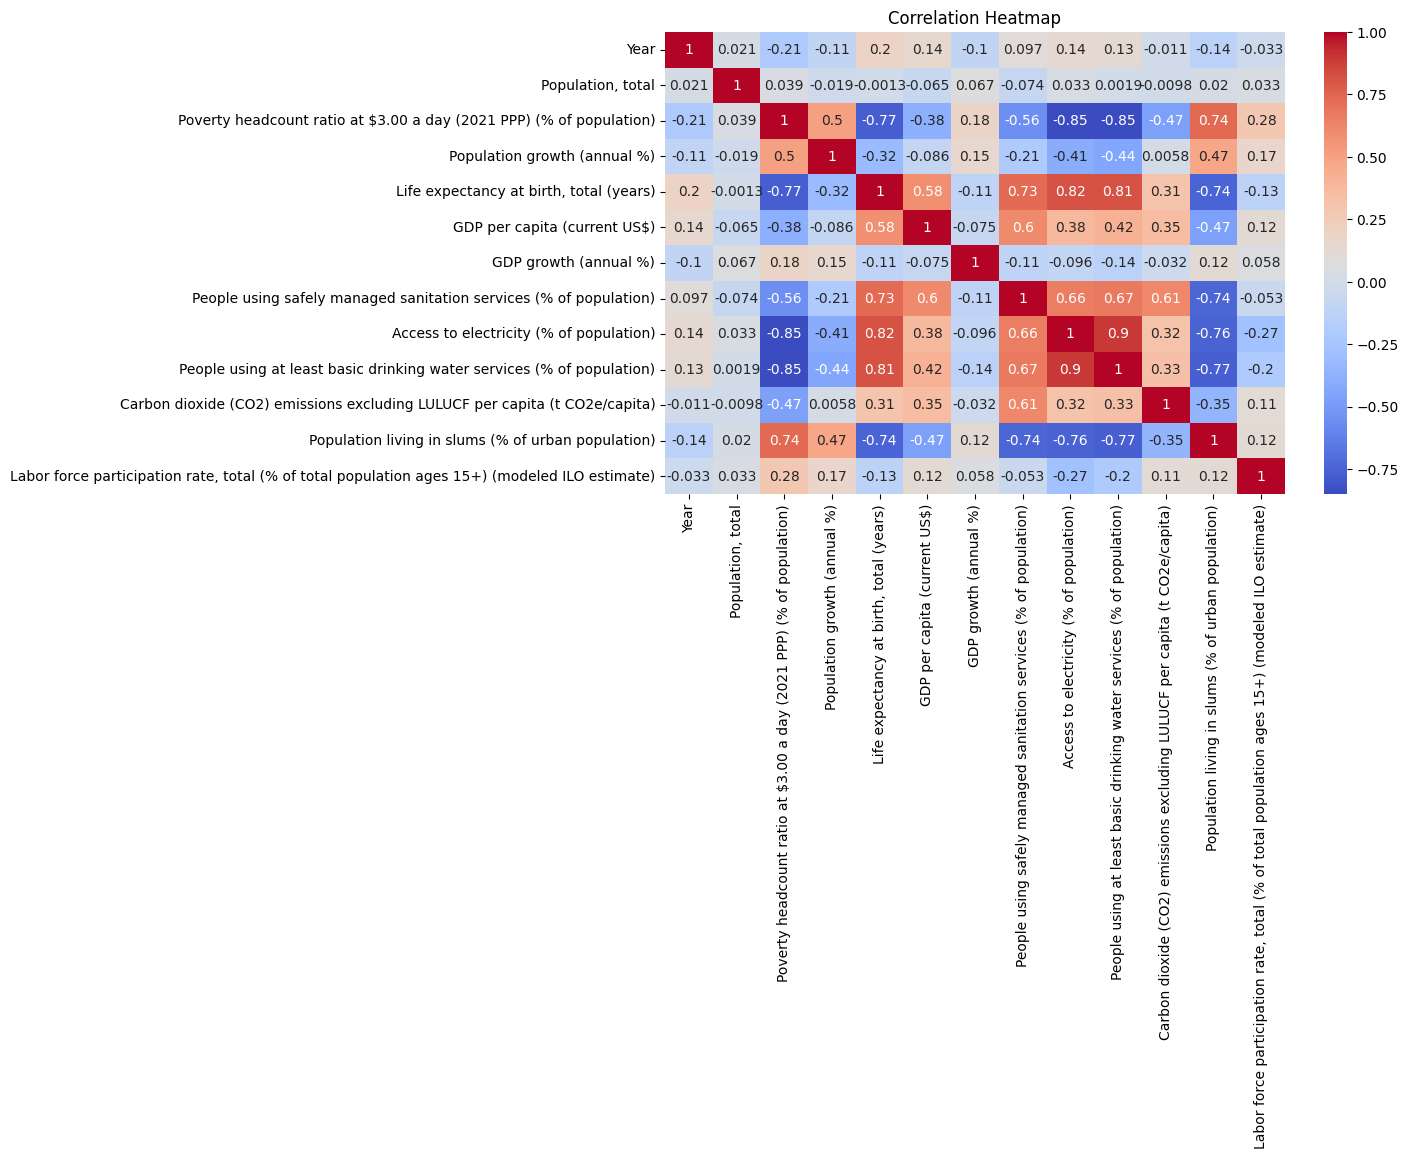

In [4]:
# Histogram cho các cột số
df.hist(bins=20, figsize=(12, 8))
plt.show()

# Heatmap tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Làm sạch dữ liệu
- Điền giá trị thiếu bằng trung bình (mean)
- One-hot encoding cho các biến phân loại (nếu có)
- Chuẩn hóa các cột số bằng mean normalization


In [5]:
# Xử lý missing values
df = df.fillna(df.mean(numeric_only=True))

# Nếu có cột không phải số -> one-hot encoding
df = pd.get_dummies(df)

# Chuẩn hóa numeric columns
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),...,Country Code_VGB,Country Code_VIR,Country Code_VNM,Country Code_VUT,Country Code_WSM,Country Code_XKX,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE
0,0.000000,0.000056,0.099158,0.374731,0.812668,0.080210,0.425914,0.542276,0.916331,0.932226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.041667,0.000056,0.099158,0.371833,0.814133,0.080440,0.402261,0.542276,1.000000,0.935690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.083333,0.000057,0.099158,0.364483,0.815402,0.082651,0.367017,0.542276,1.000000,0.939154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.125000,0.000058,0.099158,0.377980,0.816810,0.085155,0.381147,0.542276,1.000000,0.942618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.166667,0.000059,0.099158,0.408144,0.816629,0.091983,0.423651,0.542276,1.000000,0.946082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Chia dữ liệu thành Train/Test
Tỷ lệ 90% train – 10% test.

In [6]:
train_df, test_df = train_test_split(df_scaled, test_size=0.1, random_state=42)

# Lưu kết quả
train_df.to_csv("../data/train.csv", index=False)
test_df.to_csv("../data/test.csv", index=False)

print("Đã lưu train.csv và test.csv vào thư mục data/")

Đã lưu train.csv và test.csv vào thư mục data/


## Kết luận
- Dữ liệu đã được làm sạch, chuẩn hóa, và chia thành train/test.
- Các file đã sẵn sàng cho bước huấn luyện mô hình trong các notebook sau.